
  There is a binary version available but the source version is later:
      binary source needs_compilation
dplyr  1.0.6  1.0.7              TRUE

  Binaries will be installed


Warning message:
"package 'dplyr' is in use and will not be installed"also installing the dependencies 'testthat', 'vdiffr'




  There are binary versions available but the source versions are later:
         binary source needs_compilation
testthat  3.0.2  3.0.4              TRUE
vdiffr    0.3.3  1.0.2              TRUE
ggplot2   3.3.3  3.3.5             FALSE

  Binaries will be installed
package 'testthat' successfully unpacked and MD5 sums checked
package 'vdiffr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\asus\AppData\Local\Temp\RtmpyKZrJ2\downloaded_packages


installing the source package 'ggplot2'



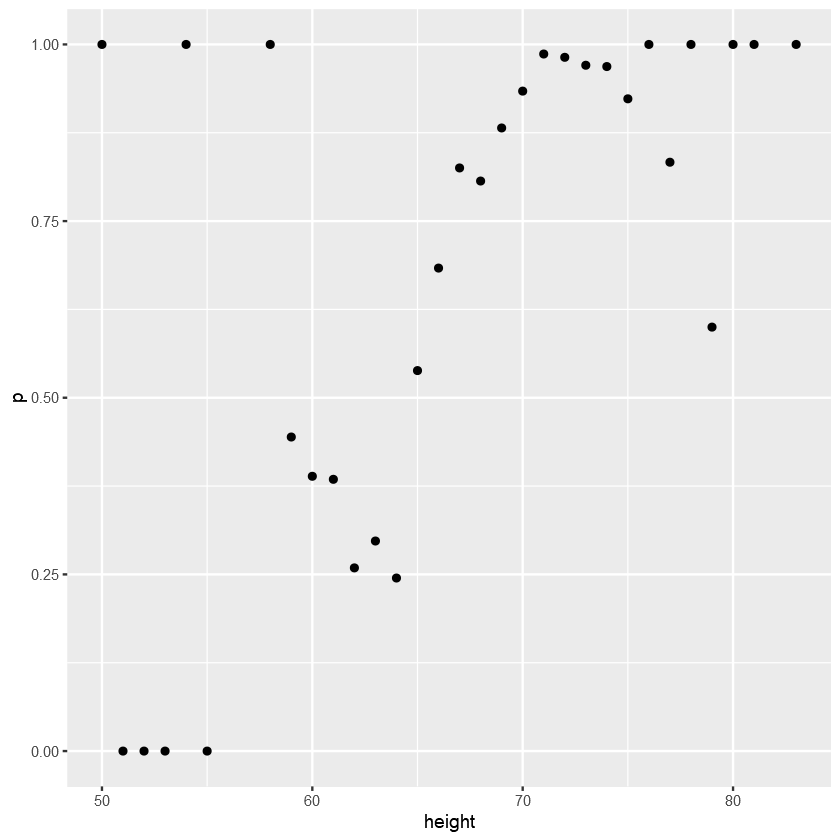

In [11]:
# Q6 
# We are now going to write code to compute conditional probabilities for being male in the heights dataset. 
# Round the heights to the closest inch. Plot the estimated conditional probability 
# P(x)=Pr(Male|height=x) for each x.

library(dslabs)
install.packages("dplyr")
install.packages('ggplot2', dep = TRUE)
library(dplyr)
library(ggplot2)
data("heights")
# MISSING CODE
# compute conditional probabilities for being male in the heights dataset. Round the heights to the closest inch. 
# Plot the estimated conditional probability.
heights %>% 
	mutate(height = round(height)) %>%
	group_by(height) %>%
	summarize(p = mean(sex == "Male")) %>%
	qplot(height, p, data =.)

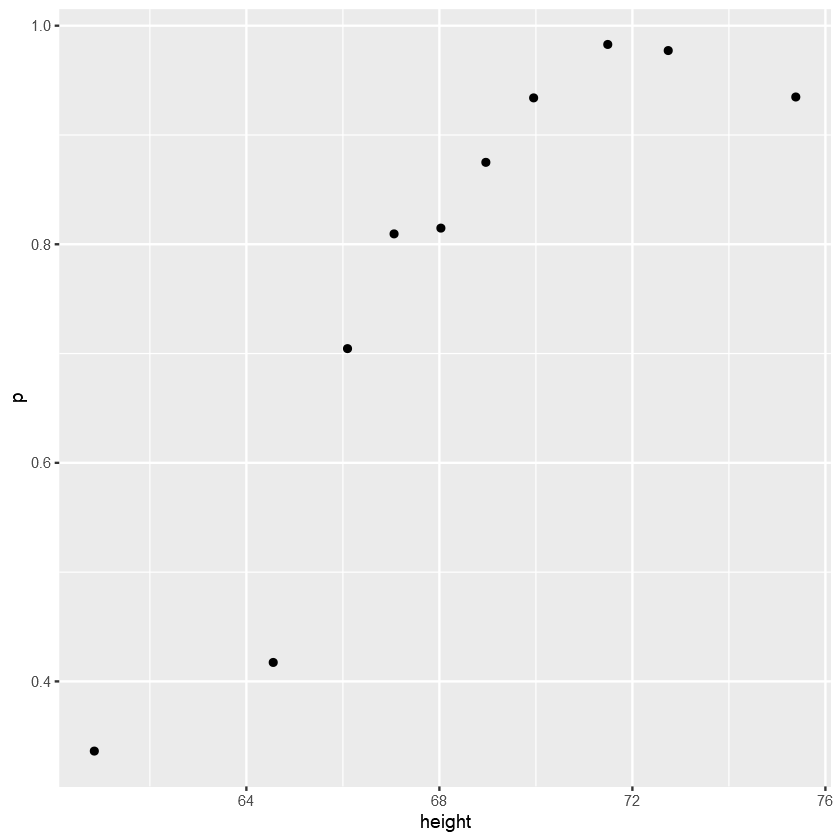

In [12]:
# Q7
# In the plot we just made in Q6 we see high variability for low values of height. 
# This is because we have few data points. This time use the quantile 0.1,0.2,...,0.9 and the cut() function 
# to assure each group has the same number of points. 
# Note that for any numeric vector x, you can create groups based on quantiles like this: 
# cut(x, quantile(x, seq(0, 1, 0.1)), include.lowest = TRUE).

ps <- seq(0, 1, 0.1)
heights %>% 
	mutate(g = cut(height, quantile(height, ps), include.lowest = TRUE)) %>%
	group_by(g) %>%
	summarize(p = mean(sex == "Male"), height = mean(height)) %>%
	qplot(height, p, data =.)

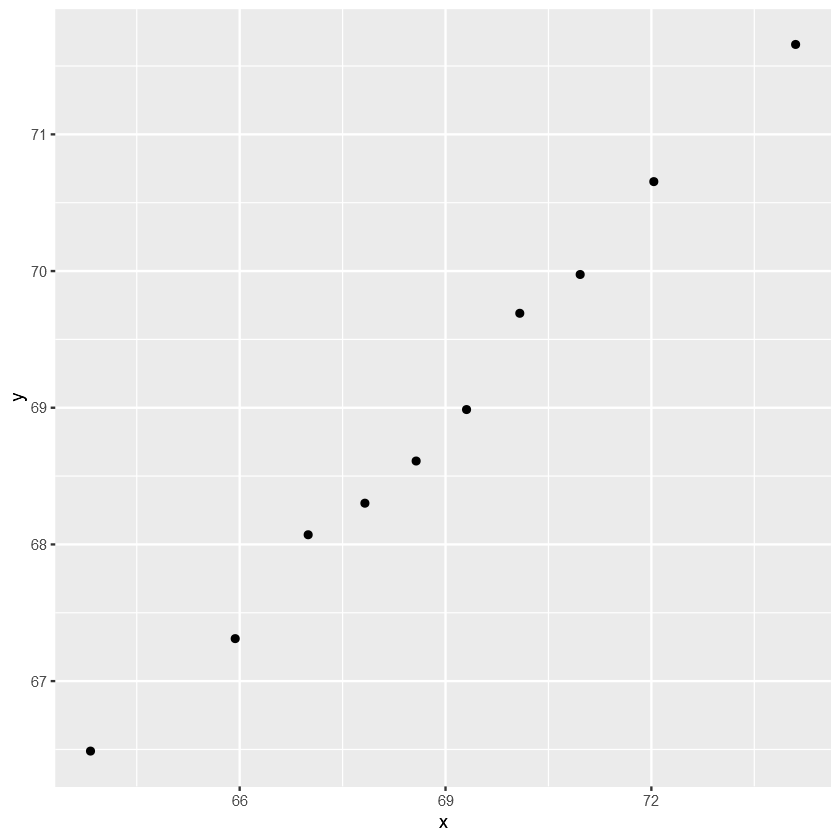

In [14]:
# Q8
# You can generate data from a bivariate normal distrubution using the MASS package using the following code:

Sigma <- 9*matrix(c(1,0.5,0.5,1), 2, 2)
dat <- MASS::mvrnorm(n = 10000, c(69, 69), Sigma) %>%
	data.frame() %>% setNames(c("x", "y"))

# And you can make a quick plot using plot(dat).
# Using an approach similar to that used in the previous exercise, let's estimate the conditional expectations 
# and make a plot. 

ps <- seq(0, 1, 0.1)
dat %>% 
	mutate(g = cut(x, quantile(x, ps), include.lowest = TRUE)) %>%
	group_by(g) %>%
	summarize(y = mean(y), x = mean(x)) %>%
	qplot(x, y, data =.)